In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import the models
from sklearn.svm import SVR


In [29]:
# change for clean or unclean
file_name = "../data/data_without_outliers.csv"
df = pd.read_csv(file_name)

In [30]:
# Define features (X) and target (y)
# We drop StartupID as it's an identifier, not a predictive feature.
X = df.drop(columns=["StartupID", "Success Score"])
y = df["Success Score"]

# Calculate Mutual Information scores to find the most predictive features
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Select the top 15 features
top_features = mi_scores.sort_values(ascending=False).head(15).index.tolist()

print("Top 15 features selected based on Mutual Information:")
print(top_features)

# Create the final feature set with only the top predictors
X = X[top_features]

print(f"\nFinal feature set shape: {X.shape}")

Top 15 features selected based on Mutual Information:
['Founded Year', 'IPO?', 'Log_Annual Revenue ($M)', 'Log_Number of Employees', 'Industry_Energy', 'Industry_E-commerce', 'Uses_Java', 'Industry_AI', 'Uses_AI', 'Log_Valuation ($B)', 'Industry_Logistics', 'Log_Social Media Followers', 'Industry_FinTech', 'Log_Revenue per Employee', 'Funding Stage_Seed']

Final feature set shape: (3471, 15)


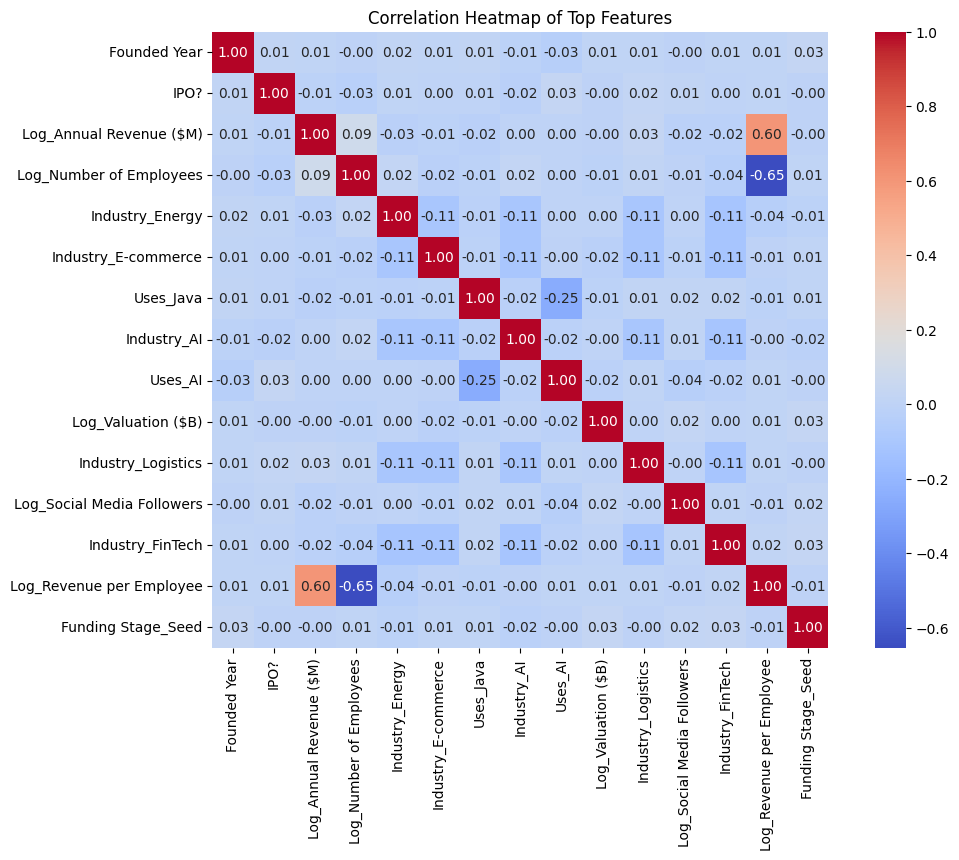

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Top Features")
plt.show()

Map results show:
- 

Top 3 correlations

    1. Log Annual Revenue and Log Revenue per Employee (+0.60)

    2. Log Number of Employees and Log Revenue per Employee (-0.65)

    3. Uses Java and Uses AI (-0.25)

Positives

    - Diagonal = 1.0 (self correlation)
    
    - Off diagonal values are below 0.9 

Map shows that the features are independant of each other


In [32]:
# split into 80/20 train and test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("--- Data Split & Scaling Complete ---")
print(f"Training set size: {len(X_train)} rows")
print(f"Testing set size: {len(X_test)} rows")
print("\n" + "=" * 50 + "\n")

--- Data Split & Scaling Complete ---
Training set size: 2776 rows
Testing set size: 695 rows




This is where it becomes different based on model

In [37]:
svr = SVR(
    kernel='linear',C = 1, gamma = 'scale' ,epsilon= 0.1
)

# Train the model
svr.fit(X_train, y_train)

# Make predictions on the test set
svr_predictions = svr.predict(X_test)

# Evaluate the model
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = root_mean_squared_error(y_test, svr_predictions)
print(f"SVR MAE: {svr_mae:.4f}")
print(f"SVR MSE: {svr_mse:.4f}")
print(f"SVR R-squared: {svr_r2:.4f}")
print(f"SVR RMSE: {svr_rmse:.4f}")

SVR MAE: 2.2911
SVR MSE: 6.8676
SVR R-squared: -0.0118
SVR RMSE: 2.6206


Results:

SVR MAE: 2.2911

SVR MSE: 6.8676

SVR R-squared: -0.0118

SVR RMSE: 2.6206